In [ ]:
#importing required libraries
import numpy as np
from sklearn.linear_model import LinearRegression 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#reading csv
df = pd.read_csv("/content/temp.csv")

In [ ]:
#printing data frame
print(df)

   hours  marks
0      5      9
1      7     11
2     12     18
3      9     15
4      2      5
5      4      7


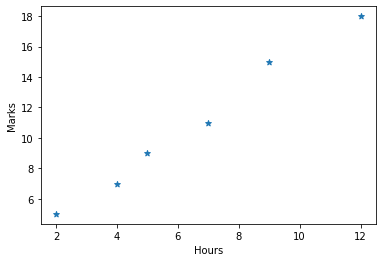

In [ ]:
#giving label to x axis
plt.xlabel("Hours")
#giving label to y axis
plt.ylabel("Marks")
#plotting a scatterplot graph using matplotlib
plt.scatter(df.hours, df.marks, marker="*")

In [ ]:
x=df[["hours"]]
y=df[['marks']]

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x,y)

LinearRegression()

In [ ]:
#printing results
r_sq =model.score(x,y)
print("R^2 is ", r_sq)

R^2 is  0.9895972624374836


In [ ]:
print("intercept b0: ", model.intercept_)
print("slope b1: ", model.coef_)


intercept b0:  [2.05089059]
slope b1:  [[1.35114504]]


In [ ]:
#making prediction for x=10 hours
model.predict([[10]])

array([[15.56234097]])

In [ ]:
#making prediction for all values of x
ypred = model.predict(x)
print(ypred)

[[ 8.80661578]
 [11.50890585]
 [18.26463104]
 [14.21119593]
 [ 4.75318066]
 [ 7.45547074]]


In [ ]:
#adding predicted marks to the df
df['pred_marks']=ypred

In [ ]:
print(df)

   hours  marks  pred_marks
0      5      9    8.806616
1      7     11   11.508906
2     12     18   18.264631
3      9     15   14.211196
4      2      5    4.753181
5      4      7    7.455471


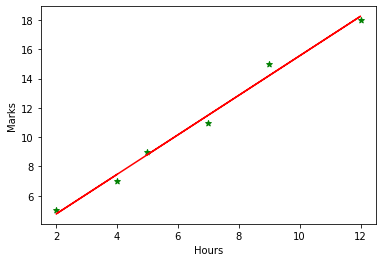

In [ ]:
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.scatter(df.hours, df.marks, color='green', marker='*')
plt.plot(df.hours, df.pred_marks, color='red')

In [ ]:
#finding (y-y^)**2
ysscap_sq = (df['marks']-df['pred_marks'])**2
df['ysscap_sq'] = ysscap_sq


In [ ]:
print(df)

   hours  marks  pred_marks  ysscap_sq
0      5      9    8.806616   0.037397
1      7     11   11.508906   0.258985
2     12     18   18.264631   0.070030
3      9     15   14.211196   0.622212
4      2      5    4.753181   0.060920
5      4      7    7.455471   0.207454


In [ ]:
sse = df['ysscap_sq'].sum()

In [ ]:
print(sse)

1.256997455470738


In [ ]:
ysybar = (df['marks']-(df['marks'].mean()))
df['ysybar']=ysybar

In [ ]:
ysybar_sq = (df['marks']-(df['marks'].mean()))**2
df['ysybar_sq']=ysybar_sq

In [ ]:
print(df)

   hours  marks  pred_marks  ysscap_sq    ysybar  ysybar_sq
0      5      9    8.806616   0.037397 -1.833333   3.361111
1      7     11   11.508906   0.258985  0.166667   0.027778
2     12     18   18.264631   0.070030  7.166667  51.361111
3      9     15   14.211196   0.622212  4.166667  17.361111
4      2      5    4.753181   0.060920 -5.833333  34.027778
5      4      7    7.455471   0.207454 -3.833333  14.694444


In [ ]:
sst = df['ysybar_sq'].sum()

In [ ]:
print(sst)

120.83333333333333


In [ ]:
ycapsybar_sq = (df['pred_marks']-(df['marks'].mean()))**2
df['ycapsybar_sq']=ycapsybar_sq

In [ ]:
print(df)

   hours  marks  pred_marks  ysscap_sq    ysybar  ysybar_sq  ycapsybar_sq
0      5      9    8.806616   0.037397 -1.833333   3.361111      4.107584
1      7     11   11.508906   0.258985  0.166667   0.027778      0.456398
2     12     18   18.264631   0.070030  7.166667  51.361111     55.224186
3      9     15   14.211196   0.622212  4.166667  17.361111     11.409956
4      2      5    4.753181   0.060920 -5.833333  34.027778     36.968257
5      4      7    7.455471   0.207454 -3.833333  14.694444     11.409956


In [ ]:
ssr = df['ycapsybar_sq'].sum()

In [ ]:
print(ssr)

119.57633587786259


In [ ]:
r_sq2= ssr/sst
print(r_sq2)

0.9895972624374836


In [ ]:
#b1
xsxbar = (df['hours']-(df['hours'].mean()))
xsxbar_sq = xsxbar**2
df['xsxbar']=xsxbar
df['xsxbar_sq']=xsxbar_sq

In [ ]:
df


,hours,marks,pred_marks,ysscap_sq,ysybar,ysybar_sq,ycapsybar_sq,xsxbar,xsxbar_sq
0,5,9,8.806616,0.037397,-1.833333,3.361111,4.107584,-1.5,2.25
1,7,11,11.508906,0.258985,0.166667,0.027778,0.456398,0.5,0.25
2,12,18,18.264631,0.070030,7.166667,51.361111,55.224186,5.5,30.25
3,9,15,14.211196,0.622212,4.166667,17.361111,11.409956,2.5,6.25
4,2,5,4.753181,0.060920,-5.833333,34.027778,36.968257,-4.5,20.25
5,4,7,7.455471,0.207454,-3.833333,14.694444,11.409956,-2.5,6.25


In [ ]:
df['b1_numerator']=df['xsxbar']*df['ysybar']
b1 = (df['b1_numerator'].sum())/(df['xsxbar_sq'].sum())
print(b1)

1.3511450381679388


In [ ]:
b0 = (df['marks'].mean()-(b1*(df['hours'].mean())))
b0

2.0508905852417314

**Observations:**
> Regression problem was solved using LinearRegression() from sklearn and the same was also obtained without using built-in functions using formula. Use of matplotlib library was learnt to plot the regression line.

**Conclusion:**
> Successfully obtained SSE, SST and SSR values and calculated R^2 and R value, performed the above task using LinearRegression() from sklearn as well as using formula and plotted the regression line using matplotlib. In linear regression models, R-squared is a goodness-fit-measure, R^2 value is large hence there  is a better chance of the regression model fitting the observations. 